In [72]:
import tensorflow.compat.v1 as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.models import Sequential, load_model

from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense 

In [73]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
#import tensorflow as tf
import keras
get_ipython().run_line_magic('matplotlib', 'inline')


from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from skimage.transform import resize
import seaborn as sns
import cv2

In [74]:
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 30
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [75]:
(input_train,target_train),(input_test, target_test) = datasets.cifar100.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)


In [76]:
input_shape = (img_width, img_height, img_num_channels)

In [77]:
input_train = input_train / 255
input_test = input_test / 255


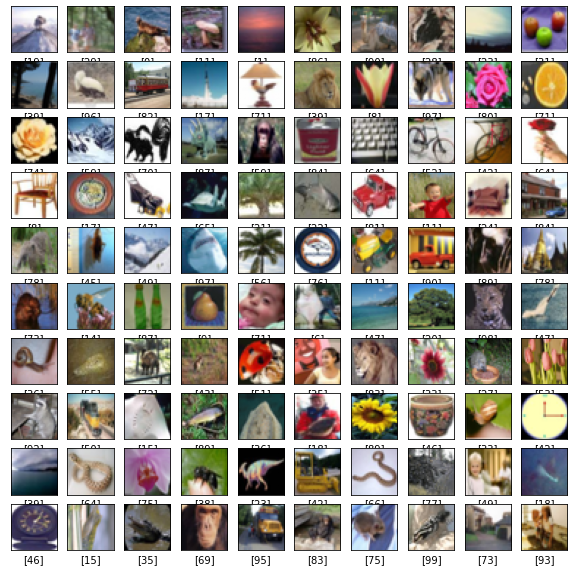

In [78]:
plt.figure(figsize=(10,10))
for image in range(0,100):
    i=image
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot=input_test[j]
    plt.imshow(data_plot)
    plt.xlabel(str(target_train[j]))
plt.show()

In [79]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))


In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [81]:
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])


In [82]:
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_data=(input_test,target_test))

Epoch 1/30
1000/1000 [==============================] - 69s 69ms/step - loss: 4.0215 - accuracy: 0.0783 - val_loss: 3.6081 - val_accuracy: 0.1427
Epoch 2/30
1000/1000 [==============================] - 70s 70ms/step - loss: 3.3633 - accuracy: 0.1869 - val_loss: 3.1869 - val_accuracy: 0.2198
Epoch 3/30
1000/1000 [==============================] - 70s 70ms/step - loss: 3.0298 - accuracy: 0.2480 - val_loss: 2.9512 - val_accuracy: 0.2729
Epoch 4/30
1000/1000 [==============================] - 70s 70ms/step - loss: 2.8042 - accuracy: 0.2903 - val_loss: 2.8328 - val_accuracy: 0.2912
Epoch 5/30
1000/1000 [==============================] - 70s 70ms/step - loss: 2.6243 - accuracy: 0.3285 - val_loss: 2.6773 - val_accuracy: 0.3234
Epoch 6/30
1000/1000 [==============================] - 70s 70ms/step - loss: 2.4667 - accuracy: 0.3610 - val_loss: 2.6054 - val_accuracy: 0.3435
Epoch 7/30
1000/1000 [==============================] - 70s 70ms/step - loss: 2.3395 - accuracy: 0.3877 - val_loss: 2.5894 -

In [83]:
score = model.evaluate(input_test, target_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


313/313 [==============================] - 5s 14ms/step - loss: 3.5106 - accuracy: 0.3603
Test loss: 3.5106325149536133 / Test accuracy: 0.3603000044822693


In [84]:
model.save_weights('CNN-Weights.h5')

In [85]:
model.save('CNN-Model.h5')

In [86]:
model.save_weights('CNN-weights')

In [87]:
new_model= keras.models.load_model('CNN-Model.h5')
new_model.evaluate(input_test,target_test)

313/313 [==============================] - 5s 14ms/step - loss: 3.5106 - accuracy: 0.3603


[3.5106325149536133, 0.3603000044822693]

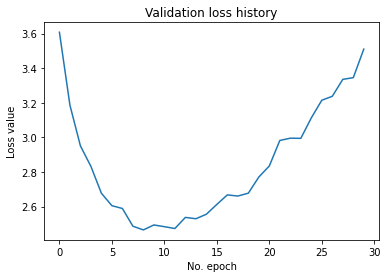

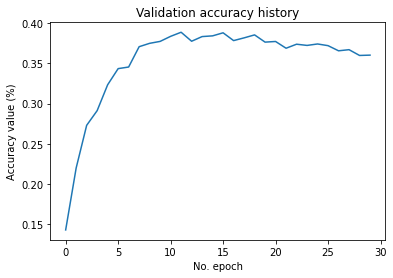

In [88]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

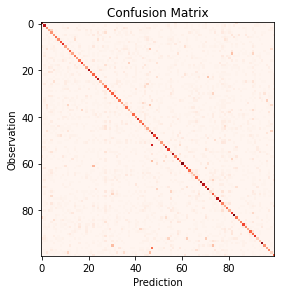

In [89]:
def plot_confusion_matrix(cm,no_classes,
                          normalize= True,
                          title='Confusion Matrix',
                          cmap=plt.cm.Reds):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    plt.tight_layout()
    plt.ylabel('Observation')
    plt.xlabel('Prediction')
y_predict = model.predict(input_test)
y_predict_classes = np.argmax(y_predict,axis=1)
confusion_mtx = confusion_matrix(target_test,y_predict_classes)
plot_confusion_matrix(confusion_mtx,no_classes=range(100))
    